### LinearRegression 클래스 - Ordinary Least Squares 

* CRIM : 지역별 범죄 발생률
* ZN : 25,000평방피트를 초과하는 거주 지역의 비율
* INDUS : 비상업 지역 넓이 비율
* CHAS : 찰스강에 대한 더미변수(강의 경계에 위치한 경우 1, 아니면 0)
* NOX : 일산화질소 농도
* RM : 거주할 주거의 방 개수 
* AGE : 건축된 소유 주택의 연식, 1940년 이전에 건축된 소유주택 
* DIS : 5개 주요 고용센터까지의 가중 거리
* RAD : 고속도로 접근 용이도
* TAX : 10,000달러당 책정된 재산세율
* PTRATIO : 지역의 교사와 학생 수 비율
* B : 지역의 흑인 거주 비율
* LSTAT : 하위 계층의 비율
* MEDV : 본인 소유 주택 가격에서의 중앙값(Median) 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# data set
from sklearn.datasets import load_boston
from scipy import stats

In [3]:
# boston data sets load
boston = load_boston()
boston

# boston df에 target을 적용한 df를 생성
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df.head()

boston_df['PRICE'] = boston.target
print('Boston datasets의 shape:', boston_df.shape)
boston_df

Boston datasets의 shape: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [4]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [5]:
len(boston_df.columns)
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [6]:
CLASS =['김성민','박영식','손경민','곽민창','김용현']

# for i, std in enumerate(CLASS):
#     print(i, std)
    
print(int(4/4))

1


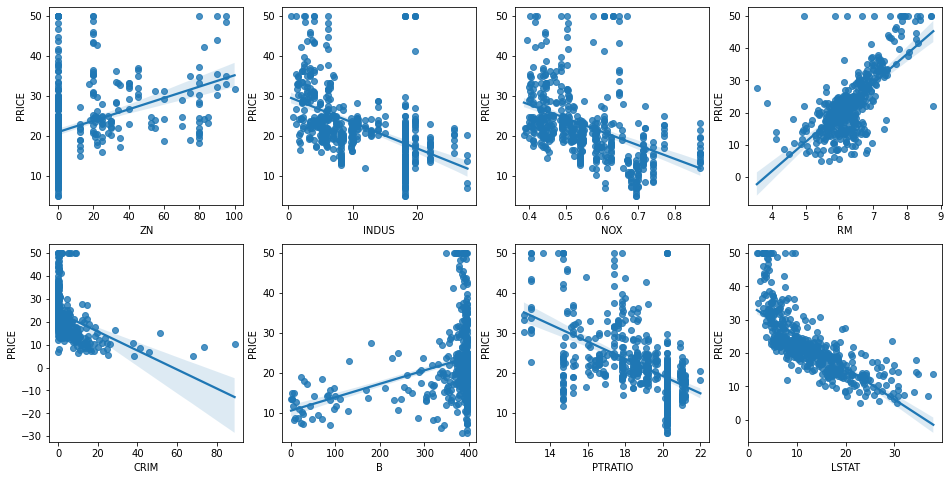

In [7]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
ftrs = ['ZN', 'INDUS', 'NOX', 'RM', 'CRIM', 'B', 'PTRATIO', 'LSTAT']

for i, ftr in enumerate(ftrs):
    col= i%4  
    row= int(i/4)
    sns.regplot(x=ftr, y='PRICE', data=boston_df, ax=axs[row,col])

<AxesSubplot:xlabel='LSTAT', ylabel='PRICE'>

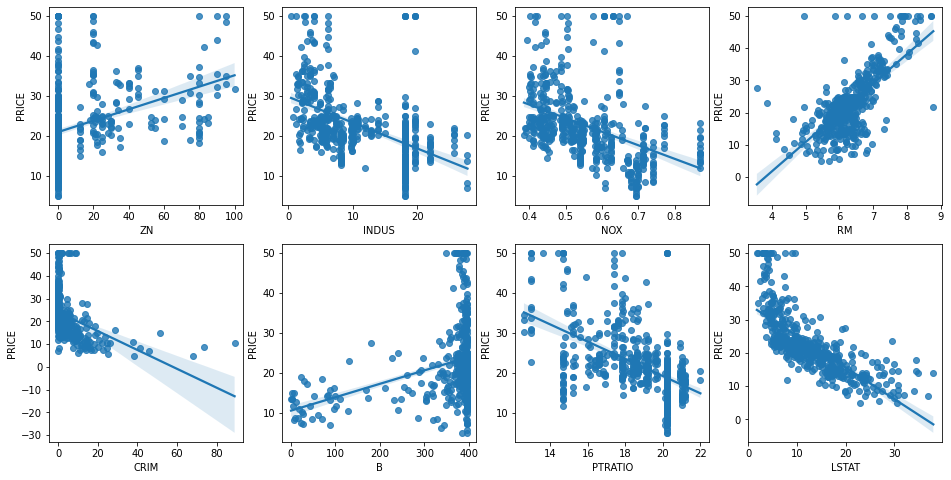

In [8]:
# NGD(노가다)기법...
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)

ftrs = ['ZN', 'INDUS', 'NOX', 'RM', 'CRIM', 'B', 'PTRATIO', 'LSTAT']

sns.regplot(x='ZN', y='PRICE', data=boston_df, ax=axs[0][0])
sns.regplot(x='INDUS', y='PRICE', data=boston_df, ax=axs[0][1])
sns.regplot(x='NOX', y='PRICE', data=boston_df, ax=axs[0][2])
sns.regplot(x='RM', y='PRICE', data=boston_df, ax=axs[0][3])

sns.regplot(x='CRIM', y='PRICE', data=boston_df, ax=axs[1][0])
sns.regplot(x='B', y='PRICE', data=boston_df, ax=axs[1][1])
sns.regplot(x='PTRATIO', y='PRICE', data=boston_df, ax=axs[1][2])
sns.regplot(x='LSTAT', y='PRICE', data=boston_df, ax=axs[1][3])

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

In [10]:
X_ftr = boston_df.drop('PRICE', axis=1)
y_target = boston_df['PRICE']

In [11]:
# 데이터 분할

X_train, X_test, y_train, y_test = train_test_split(X_ftr, y_target, test_size=0.3,
                                                   random_state=156)

# 선형회귀식으로 학습/평가/수행
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

# 예측수행
y_preds = lr_reg.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)
r2_squared = r2_score(y_test,y_preds)

print('MSE:{0:.4f}, RMSE:{1:.4f}'.format(mse,rmse))
print('r2_squared:{0:.4f}'.format(r2_squared))

MSE:17.2969, RMSE:4.1590
r2_squared:0.7572


In [12]:
# 방금전에 생성했던 선형회귀식의 계수값들을 살펴보자
print('절편 값:', lr_reg.intercept_)
print('계수(coefficient) 값:', np.round(lr_reg.coef_,2))

절편 값: 40.995595172164336
계수(coefficient) 값: [-1.10e-01  7.00e-02  3.00e-02  3.05e+00 -1.98e+01  3.35e+00  1.00e-02
 -1.74e+00  3.60e-01 -1.00e-02 -9.20e-01  1.00e-02 -5.70e-01]


In [13]:
# 회귀계수값에 이름을 붙이고, 
# 회귀계수값이 큰 순서대로 정렬해보자.
coe_series = pd.Series(data=np.round(lr_reg.coef_,3), index=X_ftr.columns)
coe_series.sort_values()

NOX       -19.796
DIS        -1.742
PTRATIO    -0.920
LSTAT      -0.566
CRIM       -0.113
TAX        -0.014
AGE         0.006
B           0.010
INDUS       0.034
ZN          0.066
RAD         0.356
CHAS        3.046
RM          3.355
dtype: float64

<AxesSubplot:>

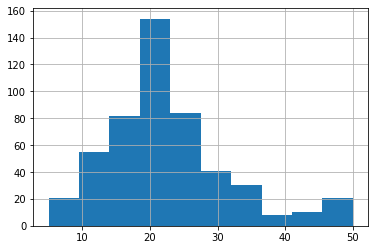

In [14]:
# price컬럼의 데이터 분포 확인

y_target.hist()

In [15]:
### 선형회귀분석에서의 ###
# 교차검증을 위한 Cross_Validation 진행

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

y_target = boston_df.PRICE
X_ftr = boston_df.drop(['PRICE'], axis=1)

# cross_val_score를 통해 cv를 5로 지정
# MSE를 구한 뒤 
# RMSE를 계산한다...

lr_reg = LinearRegression()

neg_mse_score = cross_val_score(lr_reg, X_ftr, y_target, scoring='neg_mean_squared_error',
               cv=5)

mse_scores = -1*neg_mse_score # -1을 곱해서 구한 neg값을 다시금 원복
rmse_scores = np.sqrt(mse_scores) # RMSE를 구함
avg_rmse = np.mean(rmse_scores) # cv 5번에 해당하는 값을 평균냄

print('5 folds의 개별 neg_MSE:', np.round(neg_mse_score,3))
print('5 folds의 개별 RMSE:', np.round(rmse_scores,3))
print('5 folds의 평균 RMSE:', np.round(avg_rmse,3))

5 folds의 개별 neg_MSE: [-12.46  -26.049 -33.074 -80.762 -33.314]
5 folds의 개별 RMSE: [3.53  5.104 5.751 8.987 5.772]
5 folds의 평균 RMSE: 5.829


## 다항 회귀를 이용한 과소적합 및 과적합 이해

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline # 사이킷런에서 pipeline 을 가지고 별칭을 편하게 사용
from sklearn.linear_model import LinearRegression # 선형회귀알고리즘
from sklearn.preprocessing import PolynomialFeatures # 다항식을 생성 :: 제곱식 이상을 사용
from sklearn.model_selection import cross_val_score
from sklearn.metrics import SCORERS

In [17]:
# X는 0~1까지의 30개의 임의값을
# 순서대로 샘플링해보자.

np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples)) #0에서부터 시작된 값을 sorting 후
                                       # X값에 할당
X

# 위에서 생성된 난수의 모임인 x에 대해
# 코사인 변환 값을 적용
def cosine_transform(x):
    return np.cos(1.5*np.pi*x)

# y값은 X의 코사인값의 약간의 편향(or Noise)을 더해서
# 변동값을 추가함
y = cosine_transform(X) + np.random.rand(n_samples) * 0.1


Degree 1 회귀 계수는 [-2.] 입니다.

Degree 1 MSE는 0.3855980524675215 입니다.

Degree 4 회귀 계수는 [  2. -23.  32. -11.] 입니다.

Degree 4 MSE는 0.005719308263122045 입니다.

Degree 15 회귀 계수는 [ 1.20000000e+02 -3.59900000e+03  5.21450000e+04 -4.14477000e+05
  1.80868800e+06 -3.37992400e+06 -6.02684700e+06  5.58440800e+07
 -1.69827424e+08  3.08630277e+08 -3.68966916e+08  2.93847846e+08
 -1.50696588e+08  4.51477250e+07 -6.01510500e+06] 입니다.

Degree 15 MSE는 42905665.41783635 입니다.


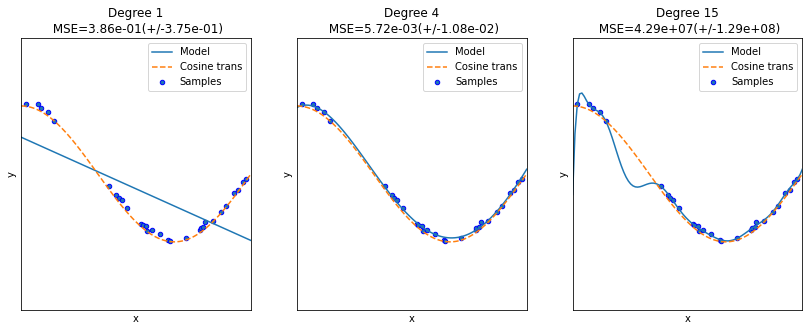

In [18]:
# 다항식 차수를 각각 1, 4, 15로 변경하며 결과비교하기
plt.figure(figsize=(14,5))
degrees = [1,4,15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키며 비교 
for i in range(len(degrees)):
    ax = plt.subplot(1,len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())
    
    #개별 degree별로 Polynomial 변환
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("poly_ftrs", polynomial_features),
                        ("lr_reg",linear_regression)])
    pipeline.fit(X.reshape(-1,1), y)
    
    # 교차 검증으로 다항 회귀를 평가하기
    scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring='neg_mean_squared_error', 
                             cv=10)
    # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
    coefficients = pipeline.named_steps['lr_reg'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients),2))
    print('\nDegree {0} MSE는 {1} 입니다.'.format(degrees[i], -1 * np.mean(scores)))
    
    # 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행
    # 테스트 데이터 세트에 회귀 예측을 수행 및 예측 곡선과 실제 곡선을 그려서 비교
    X_test = np.linspace(0,1,100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:,np.newaxis]), label="Model")
    # 실제값 곡선
    plt.plot(X_test, cosine_transform(X_test), '--', label="Cosine trans")
    plt.scatter(X, y, edgecolors='b', s=20, label="Samples")
    
    plt.xlabel("x");plt.ylabel("y");plt.xlim((0,1));plt.ylim((-2,2)); plt.legend(loc='best')
    plt.title("Degree {}\n MSE={:.2e}(+/-{:.2e})".format(degrees[i], -scores.mean(), scores.std()))
    
plt.show()

In [19]:
# 우리의 목적은 
# RSS의 최소화가 주된 목적!!! 

min(RSS) + 제약조건 

좋은 회귀모델은 적절히 데이터에 적합(fit)하면서도 회귀 계수가 급격하게 커지는 현상을 제어해야 overfitting에 빠지는 것을 피할 수 있습니다.

이 전까지의 선형모델의 경우 RSS(Residual Sum of Squares)만 제어하는 것만
신경을 썼으나,(실제 값과 예측 값의 차이만 최소화하는데 집중하는)
 

이제는 RSS최소화 + 과적합 방지  

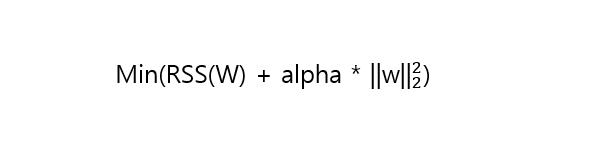

위의 2가지를 목표로 합니다

여기서 alpha는 학습 데이터 적합 정도와 회귀 계수 값의 크기 제어를 수행하는 튜닝 파라미터입니다. 비용 함수의 목표가 Min(RSS(W) + alpha * ||w||)를 최소화
하는 것일때 alpha의 역할을 보겠습니다.

alpha가 매우 작은 값(예를 들어 0이라면)이라면 비용함수의 공식은 기존과 동일한 Min(RSS(w) + 0)이
될 것입니다.

반면에 alpha가 무한대(또는 매우 큰 값)이라면 비용함수 공식은 RSS(w)에 비해 
alpha * ||w||의 제약조건이 매우 커지게 되므로 w값을 0(또는 매우 작게) 만들어야 cost가 최소화되는 비용함수 목표를 달성하게 됩니다.

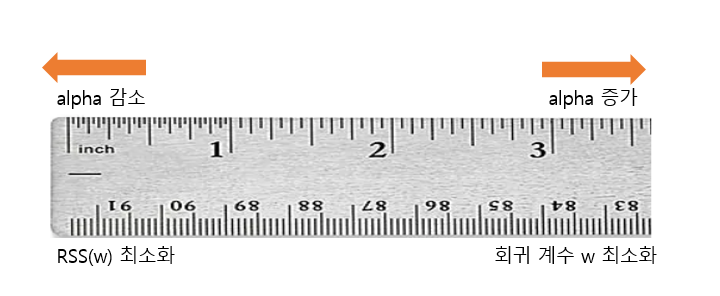

In [20]:
# L2규제 (L2_penaly :: Ridge) --> W**2 (회귀계수를 제곱하는 값을 더하는 것!!!)
# L1규제 (L1_penaly :: Lasso) -- ! 절대값을 더해주는것

In [22]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# 한 번 릿지의 alpha값을 0, 0.1, 1, 10, 100으로 변화시키면서 RMSE와 회귀계수값의 변화비교
alphas = [0, 0.1, 1, 10, 100]

# alpha에 따른 평균 rmse를 계산
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    
    #cross_val_score를 이용해 5 fold의 평균 RMSE를 계산
    neg_mse_scores = cross_val_score(ridge, X_ftr, y_target, scoring='neg_mean_squared_error',
                                     cv=5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha {0} 일 때 5 folds의 평균 RMSE:{1:.3f}'.format(alpha, avg_rmse))
    

alpha 0 일 때 5 folds의 평균 RMSE:5.829
alpha 0.1 일 때 5 folds의 평균 RMSE:5.788
alpha 1 일 때 5 folds의 평균 RMSE:5.653
alpha 10 일 때 5 folds의 평균 RMSE:5.518
alpha 100 일 때 5 folds의 평균 RMSE:5.330


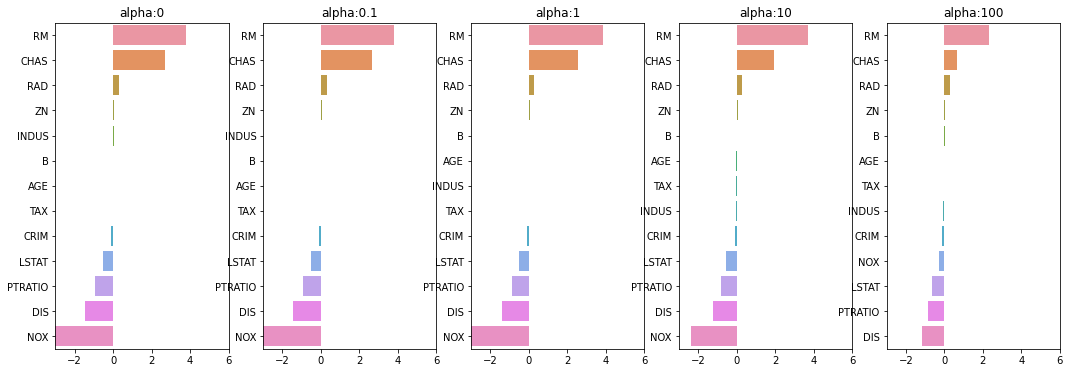

In [32]:
alphas = [0, 0.1, 1, 10, 100]

# 각 alpha에 따른 회귀 계수 값을 시각화 하기위해 5개의 columns으로 된 축 생성
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)

# 각 alpha에 따른 coeff를 저장하기 위한 df 생성
coeff_df = pd.DataFrame()

# alpha값들 차례로 입력해서, 시각화//데이터 저장. pos는 axis의 위치값 지정
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_ftr, y_target)
    # alpha 값에 따른 피처별로 coeff를 Series로 변환한 후 
    # 위의 series를 df의 컬럼으로 추가
    coeff = pd.Series(data=ridge.coef_, index=X_ftr.columns)
    colname = 'alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # bar_chart로 각 alpha값에서의 coeff를 시각화.
    # sort_values를 통해 coefff값이 높은 순서대로 표현.
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
plt.show()

In [35]:
ridge_alphas = [0, 0.1, 1, 10, 100]
# sort_columns = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by='alpha:0', ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


요약 : alpha 값이 증가하면서 회귀 계수가 지속적으로 작아지고 있으나, ridge의 경우 회귀 계수를 0으로 만들지는 않음  

In [36]:
# L1 규제인 alpha의 규제 계수

from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 df로 반환
def linear_reg_eval(model_name, params= None, X_data_n=None, y_target_n=None, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose : print('#####', model_name, '#####')
    for param in params:
        if model_name == 'Ridge': model = Ridge(alpha=param)
        elif model_name == 'Lasso': model = Lasso(alpha=param)
        elif model_name == 'ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n,
                                        scoring='neg_mean_squared_error', cv=5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:3f}'.format(param, avg_rmse))
        #cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        model.fit(X_ftr, y_target)
        #alpha에 다른 피처별 회귀 계수를 Series로 변환하고 이를 df의 컬럼으로 추가.
        coeff = pd.Series(data=model.coef_, index=X_ftr.columns)
        colname = 'alpha:'+str(param)
        coeff_df[colname] = coeff
    return coeff_df
# end of linear_reg_eval  

In [37]:
#라쏘에 사용될 alpah 파라미터의 값을 정의하고 linear_reg_eval ()함수 호출
lasso_alphas = [0.07, 0.1, 0.5, 1,3]
coeff_lasso_df = linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_ftr, y_target_n=y_target)

##### Lasso #####
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.612284
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.615116
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.669123
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.776021
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.188763


In [38]:
# 반환된 coeff_lasso_df를 첫 번째 컬럼순으로 내림차순 정렬해 회귀계수 df 출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000
